![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/py_logo.png)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Database-First-steps" data-toc-modified-id="Database-First-steps-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Database First steps</a></span><ul class="toc-item"><li><span><a href="#Mapping-airports" data-toc-modified-id="Mapping-airports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mapping airports</a></span></li><li><span><a href="#Reading-results-into-a-pandas-DataFrame" data-toc-modified-id="Reading-results-into-a-pandas-DataFrame-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reading results into a pandas DataFrame</a></span></li><li><span><a href="#Mapping-routes" data-toc-modified-id="Mapping-routes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mapping routes</a></span></li></ul></li></ul></div>

# Database First steps

To use SQlalchemy, you must first create a Connection object that represents the database. If the database name already exists SQLite3 will automatically connect to it, if it does not exsist, SQLite3 will automatically create.

For experienced users: You can also supply the special name :memory: to create a database in RAM.

Let's make the connection!

In [48]:
import sqlalchemy as db
engine = db.create_engine('sqlite:///flights.db')
connection = engine.connect()

Once we have a Connection object, we have our cursor. Cursors allow us to execute SQL queries against a database, check below.

In [49]:
data = connection.execute("select * from airlines limit 5;")

You may have noticed that we have just assigned the result of the above query to a variable. This is because we need to run another command to actually fetch the results. We can use the fetchall method to `fetch` all of the results of a query:

In [50]:
results = data.fetchall()
print(results)

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'), (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'), (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'), (3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N'), (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]


As you can see, the results are formatted as a list of [tuples](https://docs.python.org/3.5/tutorial/datastructures.html#tuples-and-sequences). Each tuple corresponds to a row in the database that we accessed. Dealing with data this way is fairly painful. We’d need to manually add column heads, and manually parse the data. Luckily, the pandas library has an easier way, which we’ll look at in the next section.

Before we move on, it’s good practice to close Connection objects and Cursor objects that are open. This prevents the SQLite database from being locked. When a SQLite database is locked, you may be unable to update the database, and may get errors. We can close the Cursor and the Connection like this:

In [51]:
connection.close()

## Mapping airports
Using our newfound knowledge of queries, we can create a plot that shows where all the airports in the world are. First, we query latitudes and longitudes:

In [1]:
import sqlalchemy as db
engine = db.create_engine('sqlite:///flights.db')
connection = engine.connect()

coords = connection.execute("select cast(longitude as float),cast(latitude as float) from airports")
data = coords.fetchall()

data

[(145.391881, -6.081689),
 (145.7887, -5.207083),
 (144.295861, -5.826789),
 (146.726242, -6.569828),
 (147.22005, -9.443383),
 (143.669186, -3.583828),
 (-45.425978, 61.160517),
 (-51.678064, 64.190922),
 (-50.689325, 67.016969),
 (-68.703161, 76.531203),
 (-18.072703, 65.659994),
 (-14.401389, 65.283333),
 (-15.227222, 64.295556),
 (-17.425978, 65.952328),
 (-23.135278, 66.058056),
 (-22.605556, 63.985),
 (-23.965, 65.555833),
 (-21.940556, 64.13),
 (-18.916667, 66.133333),
 (-20.278875, 63.424303),
 (-84.509445, 46.485001),
 (-97.0325, 50.056389),
 (-63.499444, 44.639721),
 (-56.083056, 51.391944),
 (-125.7725, 49.082222),
 (-89.808056, 68.534444),
 (-68.204444, 49.1325),
 (-70.996391, 48.330555),
 (-96.077778, 64.298889),
 (-125.270833, 49.950832),
 (-99.951944, 49.91),
 (-105.138333, 69.108055),
 (-123.870167, 49.052333),
 (-117.6325, 49.296389),
 (-65.449167, 47.007778),
 (-66.330278, 47.990833),
 (-115.143889, 67.816667),
 (-111.445278, 52.075001),
 (-121.93889, 49.152779),
 (-6

The above query will retrieve the `latitude` and `longitude` columns from `airports`, and convert both of them to floats. We then call the `fetchall` method to retrieve them.

We then need to setup our plotting by importing [matplotlib](http://matplotlib.org/), the primary plotting library for Python. Combined with the [basemap](http://matplotlib.org/basemap/) package, this allows us to create maps only using Python.

We first need to import the libraries:

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Then, we setup our map, and draw the continents and coastlines that will form the background of our map:

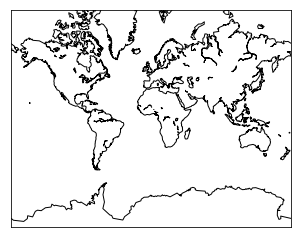

In [3]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines();

Finally, we plot the coordinates of each airport onto the map. We retrieved a list of tuples from the SQLite database. The first element in each tuple is the longitude of the airport, and the second is the latitude. We’ll convert the longitudes and latitudes into their own lists, and then plot them on the map:

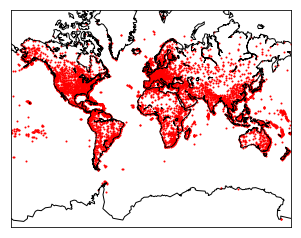

In [4]:
m.drawcoastlines()
x, y = m( [l[0] for l in data], [l[1] for l in data])
m.scatter(x,y,1,  marker='o',color='red');

As you may have noticed, working with data from the database is a bit painful. We needed to remember which position in each tuple corresponded to what database column, and manually parse out individual lists for each column. Luckily, the pandas library gives us an easier way to work with the results of SQL queries.

## Reading results into a pandas DataFrame
We can use the pandas [read_sql_query](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html) function to read the results of a SQL query directly into a pandas DataFrame. The below code will execute the same query that we just did, but it will return a DataFrame. It has several advantages over the query we did above:

- It doesn't require us to create a Cursor object or call fetchall at the end.
- It automatically reads in the names of the headers from the table.
- It creates a DataFrame, so we can quickly explore the data.

In [7]:
import pandas as pd
import sqlalchemy as db
engine = db.create_engine('sqlite:///flights.db')
connection = engine.connect()

df = pd.read_sql_query("select * from airlines limit 5;", connection)
df

,index,id,name,alias,iata,icao,callsign,country,active,airplanes
0,0,1,Private flight,\N,-,None,None,None,Y,None
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N,None
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y,None
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N,None
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N,None


As you can see, we get a nicely formatted DataFrame as the result. We could easily manipulate the columns:



In [8]:
df["country"]

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

It's highly recommended to use the `read_sql_query` function when possible.

## Mapping routes
Now that we know how to read queries into pandas DataFrames, we can create a map of every airline route in the world. We first start by querying the data. The below query will:

- Get the latitude and longitude for the source airport for each route.
- Get the latitude and longitude for the destination airport for each route.
- Convert all the coordinate values to floats.
- Read the results into a DataFrame, and store them to the variable routes.

In [9]:
routes = pd.read_sql_query("""
                           select cast(sa.longitude as float) as source_lon, 
                           cast(sa.latitude as float) as source_lat,
                           cast(da.longitude as float) as dest_lon,
                           cast(da.latitude as float) as dest_lat
                           from routes 
                           inner join airports sa on
                           sa.id = routes.source_id
                           inner join airports da on
                           da.id = routes.dest_id;
                           """, 
                           connection)

We then setup our map:

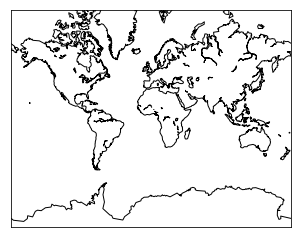

In [10]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines();

We iterate through the first 3000 rows, and draw them. The below code will:

- Loop through the first 3000 rows in routes.
- Figure out if the route is too long.
- If the route isn't too long:
    - Draw a circle between the origin and the destination.

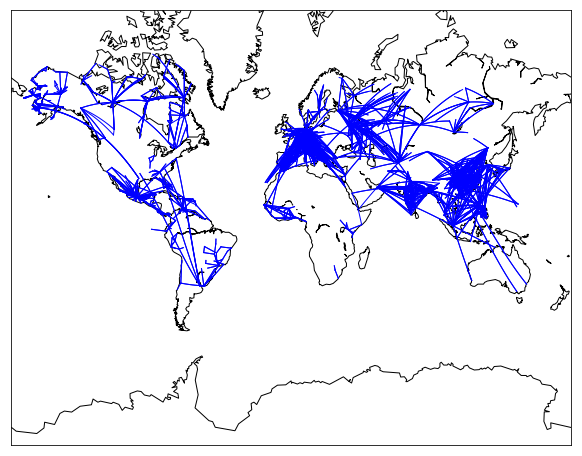

In [11]:
#m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
plt.figure(figsize=(16,8))
m.drawcoastlines()

for name, row in routes[:3000].iterrows():
    if abs(row["source_lon"] - row["dest_lon"]) < 90:
        # Draw a great circle between source and dest airports.
        m.drawgreatcircle(
            row["source_lon"], 
            row["source_lat"], 
            row["dest_lon"],
            row["dest_lat"],
            linewidth=1,
            color='b'
        )

The above is much more efficient when we use pandas to turn the results of the SQL query into a DataFrame, instead of working with the raw results from sqlite3.

Now that we know how to query database rows, let's move on to modifying them.